A Neural Network with one hidden layer to predict the ouputs of a XOR GATE

In [0]:
import numpy as np

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [0]:
def binary_cross_entropy(y, y_hat):
    epsilon = 1e-8  # avoid log(0)
    return -np.mean(
        y * np.log(y_hat + epsilon) +
        (1 - y) * np.log(1 - y_hat + epsilon)
    )

In [0]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])

In [0]:
np.random.seed(42)

input_size = 2
hidden_size = 4
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

learning_rate = 0.1
loss_mse = []
loss_bce= []

Using MSE Loss Function

In [0]:
for epoch in range(10000):

    # ---- Forward pass ----
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)

    # ---- Loss (MSE) ----
    loss = np.mean((y - y_hat) ** 2)
    loss_mse.append(loss)

    # ---- Backpropagation ----
    d_y_hat = 2 * (y_hat - y) / y.shape[0]

    d_z2 = d_y_hat * sigmoid_derivative(y_hat)
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # ---- Gradient descent ----
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.2832
Epoch 2000, Loss: 0.2452
Epoch 4000, Loss: 0.2124
Epoch 6000, Loss: 0.1502
Epoch 8000, Loss: 0.0571


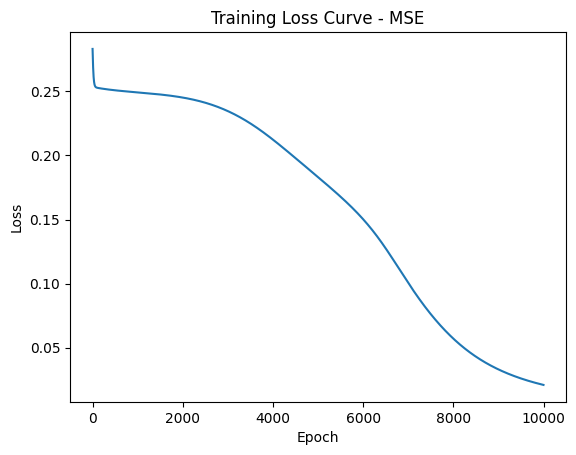

In [0]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss_mse)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve - MSE")
plt.show()

In [0]:
print("\nPredictions:")
print(y_hat.round(3))


Predictions:
[[0.103]
 [0.858]
 [0.853]
 [0.177]]


Using BCE Loss Function

In [0]:
for epoch in range(10000):

    # ---- Forward pass ----
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    # ---- BCE Loss ----
    loss = binary_cross_entropy(y, y_hat)
    loss_bce.append(loss)

    # ---- Backpropagation ----
    # KEY RESULT: BCE + sigmoid simplifies gradient
    d_z2 = y_hat - y

    d_W2 = a1.T @ d_z2
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = d_z2 @ W2.T
    d_z1 = d_a1 * sigmoid_derivative(a1)

    d_W1 = X.T @ d_z1
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # ---- Gradient descent ----
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1

    # ---- Logging ----
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")



Epoch 0, Loss: 0.1538
Epoch 2000, Loss: 0.0085
Epoch 4000, Loss: 0.0036
Epoch 6000, Loss: 0.0022
Epoch 8000, Loss: 0.0016


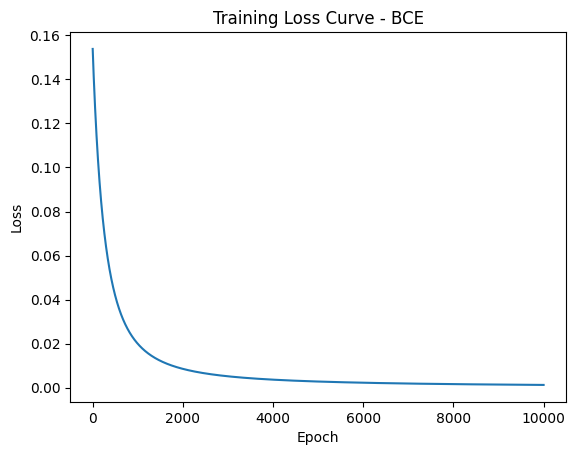

In [0]:
plt.figure()
plt.plot(loss_bce)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve - BCE")
plt.show()

In [0]:
# ----------------------------
# Final predictions
# ----------------------------
print("\nFinal Predictions:")
print(y_hat.round(3))


Final Predictions:
[[0.001]
 [0.999]
 [0.999]
 [0.002]]
